In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
company = pd.read_csv("Company_Data.csv")

In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company.shape

(400, 11)

In [5]:
#Count of duplicated rows
company[company.duplicated()].shape

(0, 11)

In [6]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


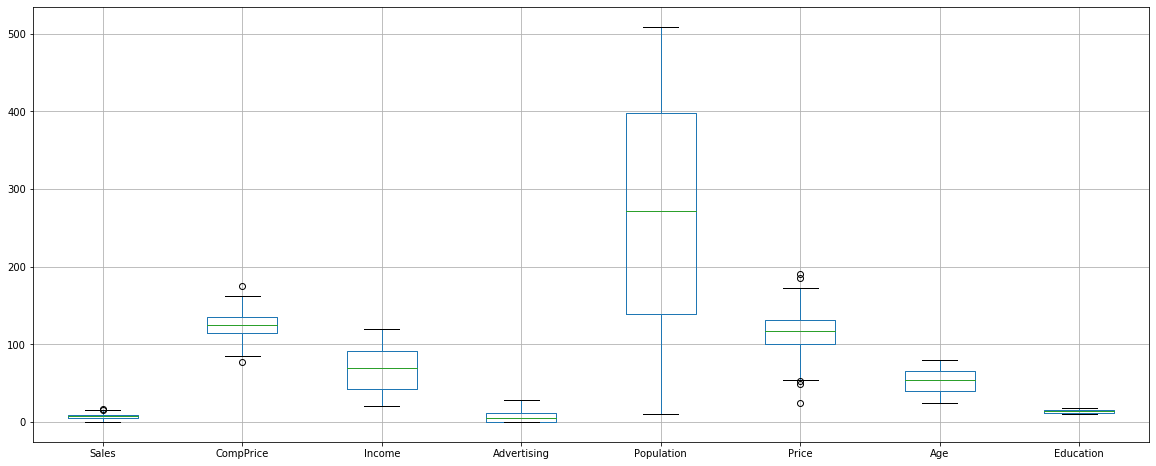

In [8]:
plt.figure(figsize=(20,8))
company.boxplot()

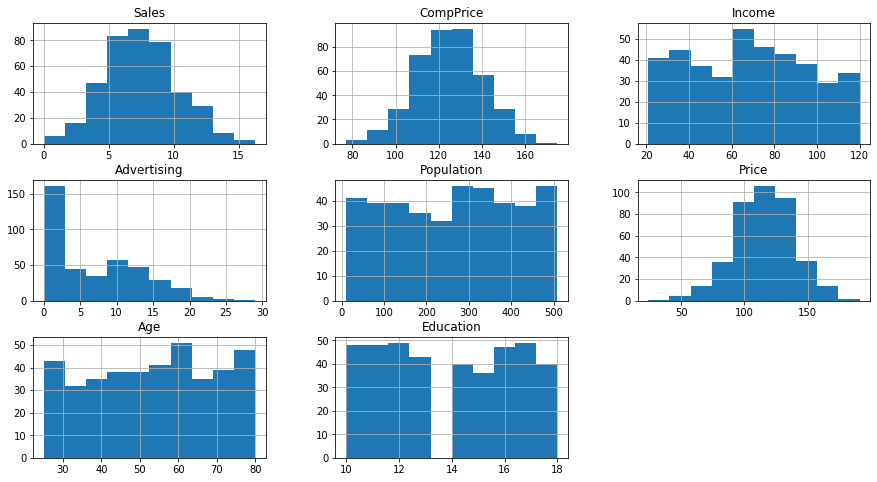

In [9]:
company.hist(figsize=(15,8))
plt.show()

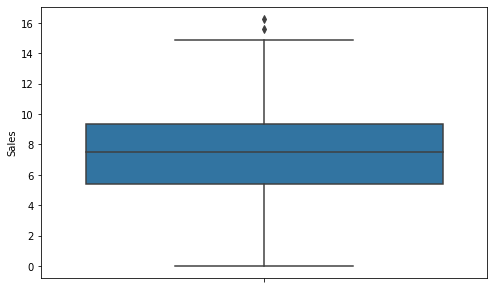

In [10]:
plt.figure(figsize = (8,5))
sns.boxplot(company['Sales'], orient = 'v')

In [11]:
np.percentile(company['Sales'] , 2)


2.0696

In [12]:
company_df = company.copy()

In [13]:
x = 0
for i in company['Sales']:
    if i < np.percentile(company['Sales'] , 33):
        company_df['Sales'][x] = 'Low'
    elif np.percentile(company['Sales'] , 33) <= i <  np.percentile(company['Sales'] , 90):
        company_df['Sales'][x] = 'Average'
    else:
        company_df['Sales'][x] = 'High'
    x += 1

C:\Users\swapnil\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\swapnil\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\swapnil\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path

In [14]:
company_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Average,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Average,111,48,16,260,83,Good,65,10,Yes,Yes
2,Average,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Average,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Average,139,23,3,37,120,Medium,55,11,No,Yes
397,Average,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


In [15]:
company_df.Sales.value_counts()

Average    229
Low        131
High        40
Name: Sales, dtype: int64

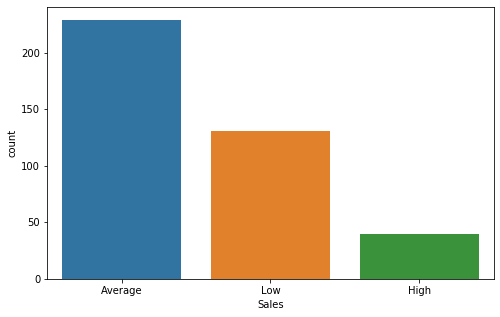

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(company_df.Sales)
plt.show()

In [17]:
X = company_df.drop(["Sales"],axis=1)
y = company_df["Sales"]

In [18]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [19]:
X= pd.get_dummies(X, drop_first = True)
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,0,0,1,1
1,111,48,16,260,83,65,10,1,0,1,1
2,113,35,10,269,80,59,12,0,1,1,1
3,117,100,4,466,97,55,14,0,1,1,1
4,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,0,1,1
396,139,23,3,37,120,55,11,0,1,0,1
397,162,26,12,368,159,40,18,0,1,1,1
398,100,79,7,284,95,50,12,0,0,1,1


In [20]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [21]:
# Normalized data frame (considering the numerical part of data)
X = norm_func(X)
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875,0.0,0.0,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000,1.0,0.0,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250,0.0,1.0,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500,0.0,1.0,1.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.145455,0.500,1.0,0.0,1.0,1.0
396,0.632653,0.020202,0.103448,0.054108,0.574850,0.545455,0.125,0.0,1.0,0.0,1.0
397,0.867347,0.050505,0.413793,0.717435,0.808383,0.272727,1.000,0.0,1.0,1.0,1.0
398,0.234694,0.585859,0.241379,0.549098,0.425150,0.454545,0.250,0.0,0.0,1.0,1.0


In [22]:
y

0      Average
1      Average
2      Average
3      Average
4          Low
        ...   
395       High
396    Average
397    Average
398        Low
399    Average
Name: Sales, Length: 400, dtype: object

**Splitting data into training and testing data set**

In [23]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=22)

### Building Decision Tree Classifier (CART) using Gini Criteria

In [24]:
model = DecisionTreeClassifier (criterion = 'gini')
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

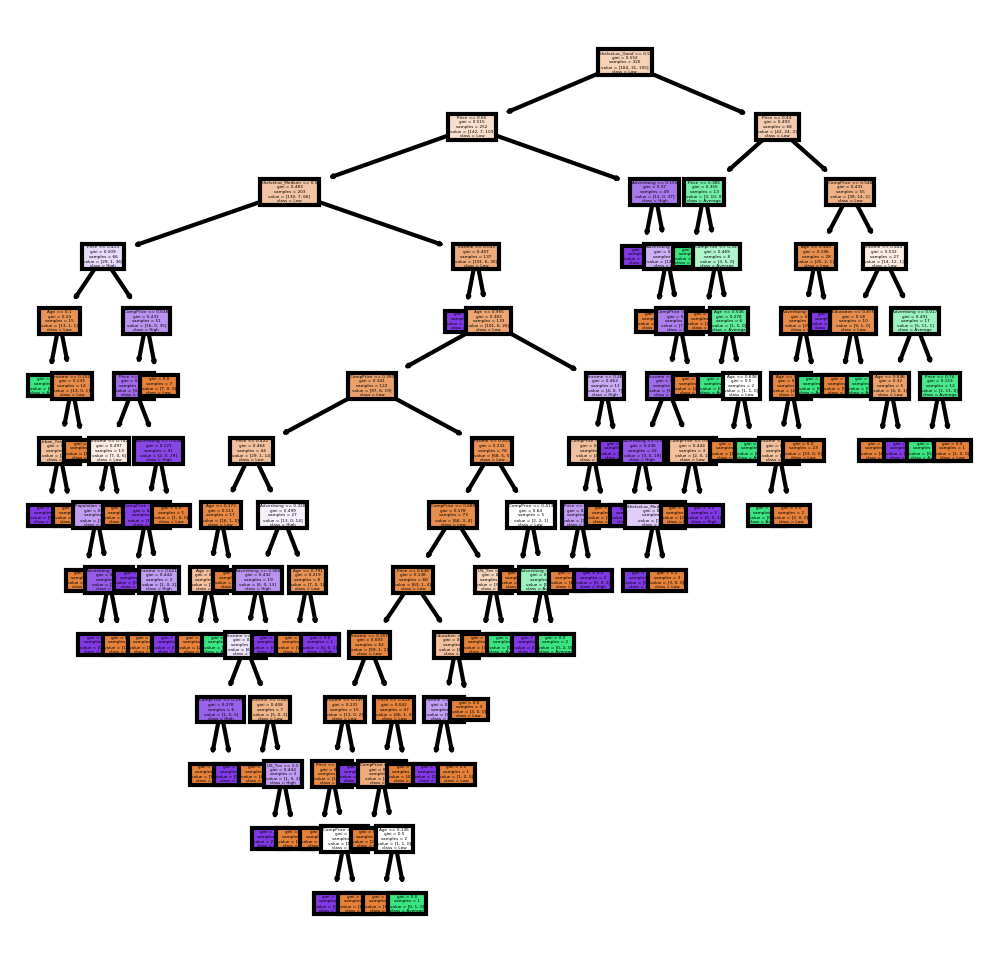

In [25]:
fn = X.columns
cn = ['Low','Average','High']
fig, axes = plt.subplots(nrows=1,ncols=1, figsize= (4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled = True);
plt.show()

In [26]:
model.get_n_leaves()

69

In [27]:
#Find the accuracy
model.score(X_test,y_test)

0.7

In [28]:
model.score(X_train,y_train)

1.0

In [29]:
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Average    43
Low        27
High       10
dtype: int64

In [30]:
preds

array(['Average', 'Average', 'Low', 'Average', 'Low', 'Average', 'High',
       'Average', 'Average', 'Low', 'Low', 'High', 'Average', 'Average',
       'Average', 'Average', 'Low', 'Average', 'Average', 'Average',
       'Average', 'Average', 'High', 'Average', 'Low', 'Average',
       'Average', 'Average', 'Low', 'High', 'Average', 'Average',
       'Average', 'Average', 'Average', 'Average', 'High', 'Low',
       'Average', 'Low', 'Low', 'Low', 'Average', 'Average', 'Low', 'Low',
       'Low', 'Average', 'Average', 'Average', 'Average', 'Average',
       'Low', 'High', 'Low', 'Average', 'Low', 'High', 'Low', 'Average',
       'Low', 'Average', 'High', 'Average', 'Low', 'Low', 'Low', 'High',
       'Average', 'Low', 'Low', 'Average', 'Low', 'Low', 'High', 'Low',
       'Average', 'Average', 'Average', 'Average'], dtype=object)

In [31]:
pd.crosstab(y_test,preds)

col_0,Average,High,Low
Sales,,,
Average,32,7,6
High,6,3,0
Low,5,0,21


In [32]:
# Accuracy 
np.mean(preds==y_test)

0.7

In [33]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

     Average       0.74      0.71      0.73        45
        High       0.30      0.33      0.32         9
         Low       0.78      0.81      0.79        26

    accuracy                           0.70        80
   macro avg       0.61      0.62      0.61        80
weighted avg       0.71      0.70      0.70        80



In [34]:
pred_train = model.predict(X_train)
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

     Average       1.00      1.00      1.00       184
        High       1.00      1.00      1.00        31
         Low       1.00      1.00      1.00       105

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



**Changing the max depth**

In [35]:
train_accuracy = []
test_accuracy = []
for depth in range (1,10):
    df_model = DecisionTreeClassifier (max_depth=depth,random_state = 22)
    df_model.fit(X_train,y_train)
    train_accuracy.append(df_model.score(X_train,y_train))
    test_accuracy.append(df_model.score(X_test,y_test))
    
    

In [36]:
frame= pd.DataFrame({'max_depth':range(1,10),'Train_acc':train_accuracy,'Test_acc':test_accuracy})
frame.head()

,max_depth,Train_acc,Test_acc
0,1,0.575000,0.5625
1,2,0.675000,0.6250
2,3,0.696875,0.6625
3,4,0.790625,0.6625
4,5,0.850000,0.6250


No handles with labels found to put in legend.


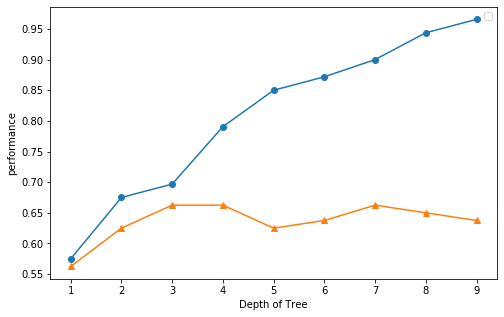

In [37]:
%matplotlib inline
plt.figure(figsize = (8,5))
plt.plot(frame["max_depth"],frame["Train_acc"],marker = 'o')
plt.plot(frame["max_depth"],frame["Test_acc"],marker = '^')
plt.xlabel('Depth of Tree')
plt.ylabel('performance')
plt.legend()
plt.show()


In [38]:
df_model = DecisionTreeClassifier (max_depth=3,random_state = 22)
df_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=22, splitter='best')

In [39]:
df_model.score(X_test,y_test)

0.6625

In [40]:
df_model.score(X_train,y_train)

0.696875

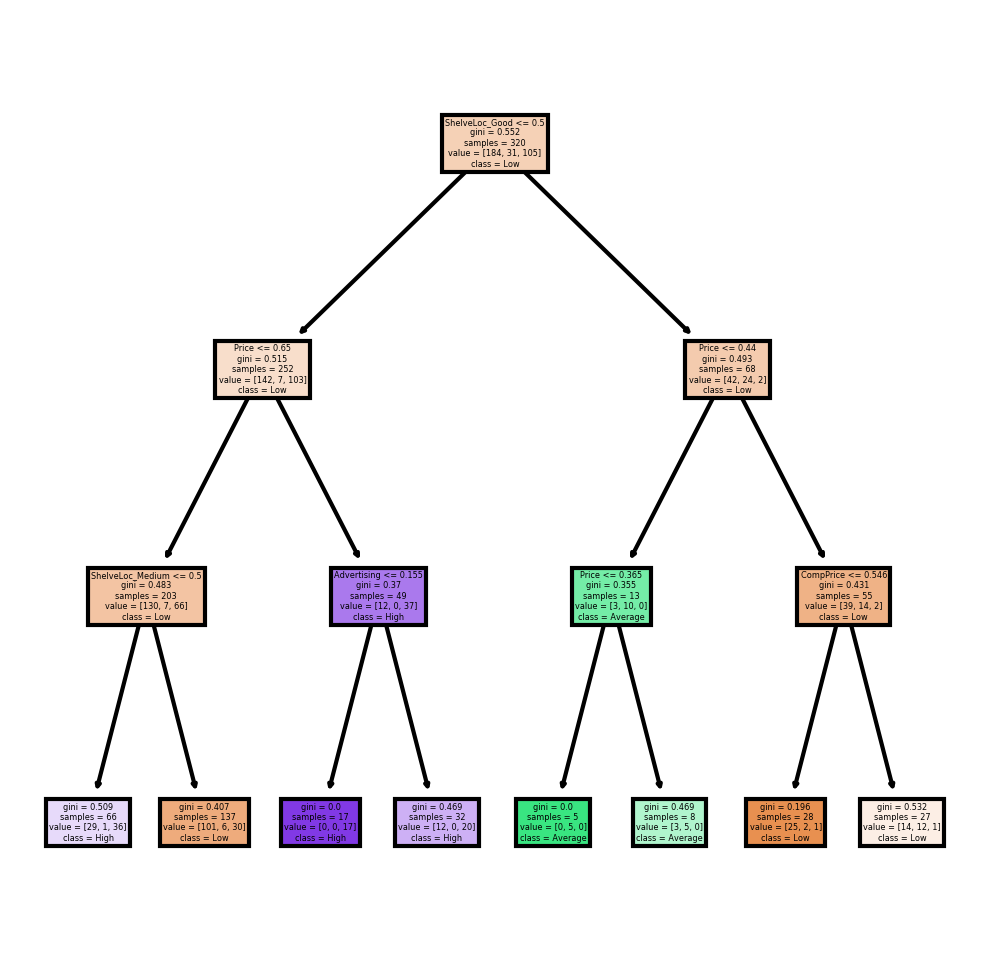

In [41]:
fn = X.columns
cn = ['Low','Average','High']
fig, axes = plt.subplots(nrows=1,ncols=1, figsize= (4,4),dpi=300)
tree.plot_tree(df_model,feature_names=fn,class_names=cn, filled = True);

# Pruning 

https://medium.com/analytics-vidhya/post-pruning-and-pre-pruning-in-decision-tree-561f3df73e65

**Determining the best alpha**

In [42]:
path=model.cost_complexity_pruning_path(X_train,y_train)
#path variable gives two things ccp_alphas and impurities
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha wil give list of values :",ccp_alphas)
print("***********************************************************")
print("Impurities in Decision Tree :",impurities)

ccp alpha wil give list of values : [0.         0.0024375  0.00260417 0.00290179 0.00292843 0.00294118
 0.00300481 0.00302083 0.00416667 0.00416667 0.00416667 0.00416667
 0.00460737 0.0047619  0.005      0.00520833 0.00520833 0.00535714
 0.00544643 0.00546875 0.00556446 0.00561343 0.005625   0.00563446
 0.00565188 0.00572917 0.00576049 0.00583333 0.00590819 0.00714286
 0.00740741 0.00757576 0.00769231 0.01100298 0.01211262 0.01278468
 0.01285846 0.01322971 0.01351641 0.01487706 0.01626543 0.02388313
 0.02514149 0.02729741 0.04224614 0.04226207]
***********************************************************
Impurities in Decision Tree : [0.         0.0121875  0.01739583 0.0231994  0.02905626 0.03493861
 0.04094823 0.04698989 0.05115656 0.05532323 0.06365656 0.06782323
 0.07703797 0.08179988 0.08679988 0.10763321 0.11284154 0.11819869
 0.12364511 0.12911386 0.13467832 0.14029175 0.14591675 0.16845459
 0.17410647 0.17983563 0.19135662 0.19718996 0.20309815 0.21024101
 0.21764842 0.22522417 0

ccp_alphas gives minimum leaf value of decision tree and each ccp_aphas will create different - different classifier and choose best out of it.ccp_alphas will be added as a parameter in DecisionTreeClassifier() .

In [43]:
clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

Last node in Decision tree is 1 and ccp_alpha for last node is 0.042262068890056015


In [44]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]


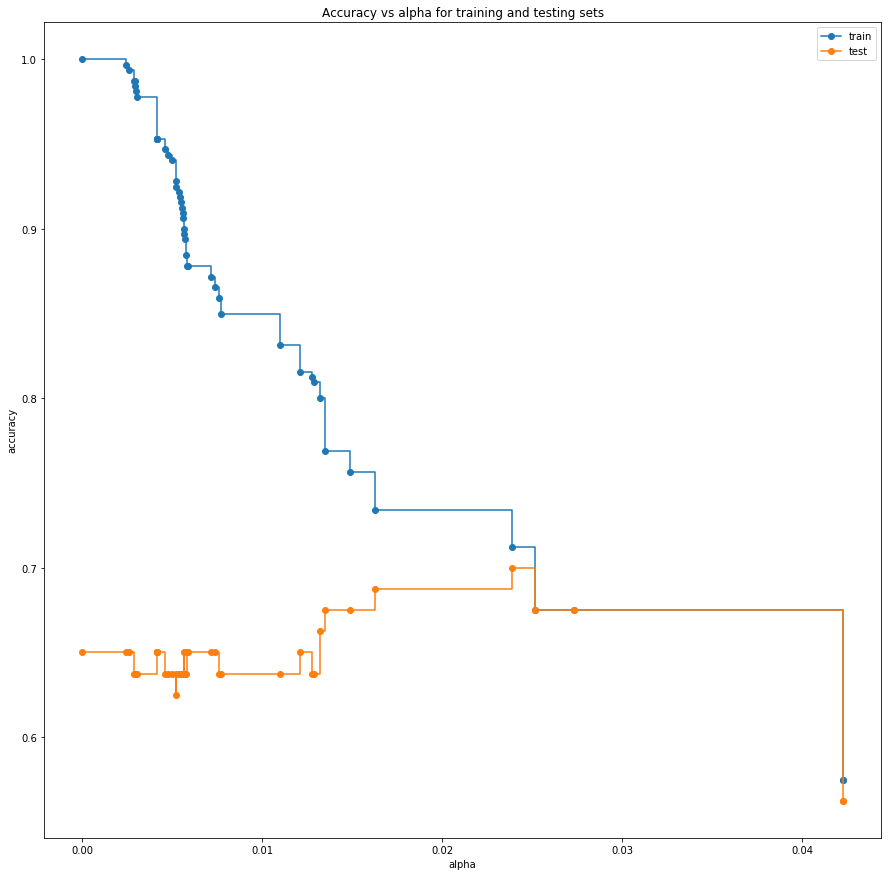

In [45]:

fig, ax = plt.subplots(figsize = (15,15))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In [46]:
from sklearn.model_selection import cross_val_score, KFold

In [47]:

alpha_values = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state = 42, criterion = 'gini', ccp_alpha =  ccp_alpha)
    scores = cross_val_score(tree, X_train, y_train, cv = 10)
    alpha_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
alpha_results = pd.DataFrame(alpha_values, columns = ['alpha', 'mean_accuracy', 'std'])
alpha_results

,alpha,mean_accuracy,std
0,0.000000,0.656250,0.096825
1,0.002437,0.659375,0.098276
2,0.002604,0.659375,0.098276
3,0.002902,0.659375,0.098276
4,0.002928,0.659375,0.098276
5,0.002941,0.659375,0.098276
6,0.003005,0.656250,0.092702
7,0.003021,0.656250,0.092702
8,0.004167,0.665625,0.098871
9,0.004167,0.665625,0.098871


In [48]:
accuracy_max = max(alpha_results['mean_accuracy'])
alpha_ideal = alpha_results[alpha_results['mean_accuracy'] == accuracy_max]
alpha_ideal = float(alpha_ideal['alpha'])
alpha_ideal

0.012112622826908542

### Pruned Decision Tree

In [49]:
clf=DecisionTreeClassifier(random_state=22,ccp_alpha=alpha_ideal)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.012112622826908542, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=22, splitter='best')

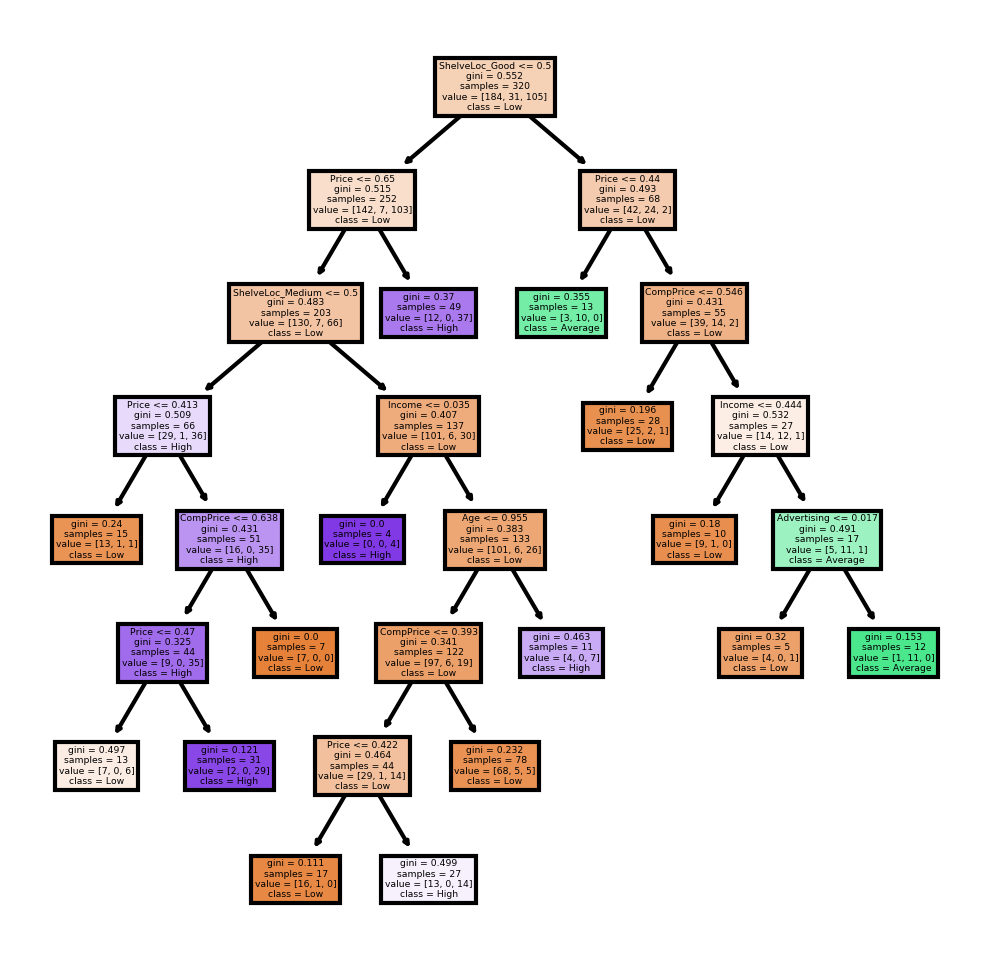

In [53]:
from sklearn import tree
fn = X.columns
cn = ['Low','Average','High']
fig, axes = plt.subplots(nrows=1,ncols=1, figsize= (4,4),dpi=300)
tree.plot_tree(clf,feature_names=fn,class_names=cn,filled = True);
plt.show()

In [54]:
clf.score(X_test,y_test)

0.65

In [55]:
clf.score(X_train,y_train)

0.815625

###  Hyperparameter tuning 

**GridSearchCV**

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }
grid_search=GridSearchCV(estimator=model,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [62]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 18, 'splitter': 'random'}


In [64]:
clf1=DecisionTreeClassifier(criterion= 'entropy',max_depth= 12,min_samples_leaf= 3,min_samples_split=18,splitter= 'random')
clf1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=18,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [65]:
clf1.score(X_test,y_test)

0.6875

In [66]:
clf1.score(X_train,y_train)

0.775